In [44]:
import math, random
import numpy as np
from collections import defaultdict, Counter
from matplotlib import pyplot as plt
# from linear_algebra import dot

In [45]:
users_interests = [
    ["Hadoop", "Big Data", "HBase", "Java", "Spark", "Storm", "Cassandra"],
    ["NoSQL", "MongoDB", "Cassandra", "HBase", "Postgres"],
    ["Python", "scikit-learn", "scipy", "numpy", "statsmodels", "pandas"],
    ["R", "Python", "statistics", "regression", "probability"],
    ["machine learning", "regression", "decision trees", "libsvm"],
    ["Python", "R", "Java", "C++", "Haskell", "programming languages"],
    ["statistics", "probability", "mathematics", "theory"],
    ["machine learning", "scikit-learn", "Mahout", "neural networks"],
    ["neural networks", "deep learning", "Big Data", "artificial intelligence"],
    ["Hadoop", "Java", "MapReduce", "Big Data"],
    ["statistics", "R", "statsmodels"],
    ["C++", "deep learning", "artificial intelligence", "probability"],
    ["pandas", "R", "Python"],
    ["databases", "HBase", "Postgres", "MySQL", "MongoDB"],
    ["libsvm", "regression", "support vector machines"]
]

In [46]:
popular_interests = Counter(interest
                            for user_interests in users_interests
                            for interest in user_interests).most_common()

In [47]:
def most_popular_new_interests(user_interests, max_results=5):
    suggestions = [(interest, frequency)
                   for interest, frequency in popular_interests
                   if interest not in user_interests]
    return suggestions[:max_results]

In [48]:
def cosine_similarity(v, w):
    return np.dot(v, w) / math.sqrt(np.dot(v, v) * np.dot(w, w))

In [49]:
unique_interests = sorted(list({ interest
                                 for user_interests in users_interests
                                 for interest in user_interests }))

In [50]:
def make_user_interest_vector(user_interests):
    """given a list of interests, produce a vector whose i-th element is 1
    if unique_interests[i] is in the list, 0 otherwise"""
    return [1 if interest in user_interests else 0
            for interest in unique_interests]

In [51]:
user_interest_matrix = list(map(make_user_interest_vector, users_interests))

user_similarities = [[cosine_similarity(interest_vector_i, interest_vector_j)
                      for interest_vector_j in user_interest_matrix]
                     for interest_vector_i in user_interest_matrix]

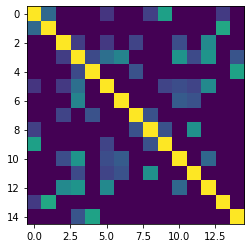

In [52]:
plt.imshow(user_similarities, cmap='viridis', interpolation='nearest')
plt.show()

In [53]:
def most_similar_users_to(user_id):
    pairs = [(other_user_id, similarity)                      # find other
             for other_user_id, similarity in                 # users with
                enumerate(user_similarities[user_id])         # nonzero
             if user_id != other_user_id and similarity > 0]  # similarity

    return sorted(pairs,                                      # sort them
                  key=lambda pair: pair[1],                   # most similar
                  reverse=True)                               # first


In [54]:
def user_based_suggestions(user_id, include_current_interests=False):
    # sum up the similarities
    suggestions = defaultdict(float)
    for other_user_id, similarity in most_similar_users_to(user_id):
        for interest in users_interests[other_user_id]:
            suggestions[interest] += similarity

    # convert them to a sorted list
    suggestions = sorted(suggestions.items(),
                         key=lambda pair: pair[1],
                         reverse=True)

    # and (maybe) exclude already-interests
    if include_current_interests:
        return suggestions
    else:
        return [(suggestion, weight)
                for suggestion, weight in suggestions
                if suggestion not in users_interests[user_id]]

In [55]:
interest_user_matrix = [[user_interest_vector[j]
                         for user_interest_vector in user_interest_matrix]
                        for j, _ in enumerate(unique_interests)]

interest_similarities = [[cosine_similarity(user_vector_i, user_vector_j)
                          for user_vector_j in interest_user_matrix]
                         for user_vector_i in interest_user_matrix]

In [56]:
def most_similar_interests_to(interest_id):
    similarities = interest_similarities[interest_id]
    pairs = [(unique_interests[other_interest_id], similarity)
             for other_interest_id, similarity in enumerate(similarities)
             if interest_id != other_interest_id and similarity > 0]
    return sorted(pairs,
                  key=lambda pair: pair[1],
                  reverse=True)

In [57]:

def item_based_suggestions(user_id, include_current_interests=False):
    suggestions = defaultdict(float)
    user_interest_vector = user_interest_matrix[user_id]
    for interest_id, is_interested in enumerate(user_interest_vector):
        if is_interested == 1:
            similar_interests = most_similar_interests_to(interest_id)
            for interest, similarity in similar_interests:
                suggestions[interest] += similarity

    suggestions = sorted(suggestions.items(),
                         key=lambda pair: pair[1],
                         reverse=True)

    if include_current_interests:
        return suggestions
    else:
        return [(suggestion, weight)
                for suggestion, weight in suggestions
                if suggestion not in users_interests[user_id]]


In [58]:
if __name__ == "__main__":

    print("Popular Interests")
    print(popular_interests)
    print()

    print("Most Popular New Interests")
    print("already like:", ["NoSQL", "MongoDB", "Cassandra", "HBase", "Postgres"])
    print(most_popular_new_interests(["NoSQL", "MongoDB", "Cassandra", "HBase", "Postgres"]))
    print()
    print("already like:", ["R", "Python", "statistics", "regression", "probability"])
    print(most_popular_new_interests(["R", "Python", "statistics", "regression", "probability"]))
    print()

    print("User based similarity")
    print("most similar to 0")
    print(most_similar_users_to(0))

    print("Suggestions for 0")
    print(user_based_suggestions(0))
    print()

    print("Item based similarity")
    print("most similar to 'Big Data'")
    print(most_similar_interests_to(0))
    print()

    print("suggestions for user 0")
    print(item_based_suggestions(0))

Popular Interests
[('Python', 4), ('R', 4), ('Big Data', 3), ('HBase', 3), ('Java', 3), ('statistics', 3), ('regression', 3), ('probability', 3), ('Hadoop', 2), ('Cassandra', 2), ('MongoDB', 2), ('Postgres', 2), ('scikit-learn', 2), ('statsmodels', 2), ('pandas', 2), ('machine learning', 2), ('libsvm', 2), ('C++', 2), ('neural networks', 2), ('deep learning', 2), ('artificial intelligence', 2), ('Spark', 1), ('Storm', 1), ('NoSQL', 1), ('scipy', 1), ('numpy', 1), ('decision trees', 1), ('Haskell', 1), ('programming languages', 1), ('mathematics', 1), ('theory', 1), ('Mahout', 1), ('MapReduce', 1), ('databases', 1), ('MySQL', 1), ('support vector machines', 1)]

Most Popular New Interests
already like: ['NoSQL', 'MongoDB', 'Cassandra', 'HBase', 'Postgres']
[('Python', 4), ('R', 4), ('Big Data', 3), ('Java', 3), ('statistics', 3)]

already like: ['R', 'Python', 'statistics', 'regression', 'probability']
[('Big Data', 3), ('HBase', 3), ('Java', 3), ('Hadoop', 2), ('Cassandra', 2)]

User b